In [2]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [3]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$

In [4]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M

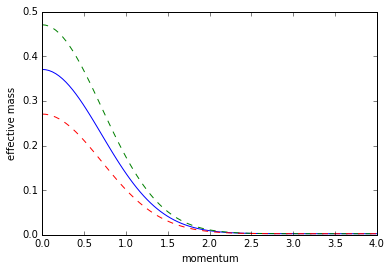

In [117]:
x_range = np.linspace(0, 4, 100)
plt.ylabel('effective mass')
plt.xlabel('momentum')
plt.plot(x_range, [mstar(x,0.368) for x in x_range],x_range, [mstar(y,0.468) for y in x_range],'--',x_range, [mstar(z,0.268) for z in x_range],'--')

energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$

In [6]:
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E

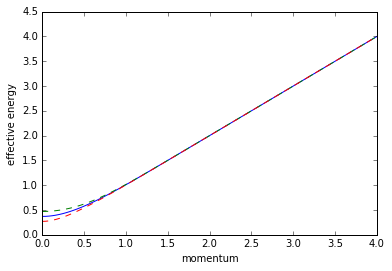

In [112]:
x_range = np.linspace(0, 4, 100)
plt.ylabel('effective energy')
plt.xlabel('momentum')
plt.plot(x_range, [E(x,0.368) for x in x_range],x_range, [E(y,0.468) for y in x_range],'--',x_range, [E(z,0.268) for z in x_range],'--')

In [8]:
def integrand(x,phi):
    Func=12*3.881/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    return Func

$||\frac{\partial \Omega}{\partial\phi}||=|\ \phi-\frac{12*3.881}{\pi^2}\int_0^\infty\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}dx\ |$

In [81]:
def Norm(phi,x0):
    N,err=integrate.quad(integrand,0,x0,args=(phi))
    N=phi-N
    return abs(N)
#minimum is in 0.368

In [164]:
z=optimize.minimize(Norm,0.3,args=(np.inf), tol=1e-14)
z.x[0]

0.36801804508311897

$\phi_0=0.36685348307811044$

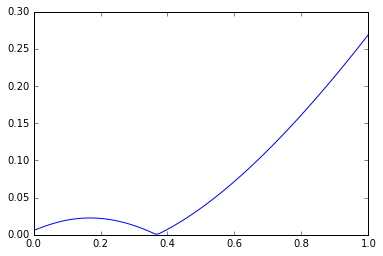

In [168]:
x_range=np.linspace(0,1,100)
plt.plot(x_range,[Norm(a,20) for a in x_range])

In [162]:
en = lambda x,phi, mu: abs(E(x,phi)-mu)
x_range = np.linspace(0, 4, 100)
z=[optimize.minimize(en,)
plt.plot(x_range, [en(x,0.368,0.3) for x in x_range],x_range, [en(y,0.368,0.4) for y in x_range],'--',x_range, [en(z,0.368,0.5) for z in x_range],'--')

SyntaxError: invalid syntax (<ipython-input-162-ab6cfddbdcd1>, line 4)

In [135]:
def x_fermi(mu,phi):
    Func= lambda x: E(x,phi)-mu
    zz=optimize.minimize(Func,1,tol=1e-14)
    return zz.x[0]

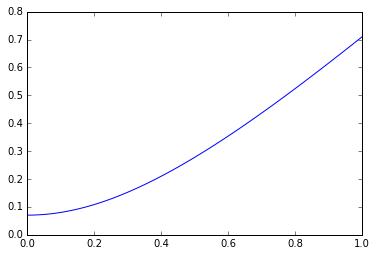

In [149]:
Func= lambda x,phi,mu: E(x,phi)-mu
x_range=np.linspace(0,1,100)
plt.plot(x_range,[Func(a,0.368,0.3) for a in x_range])

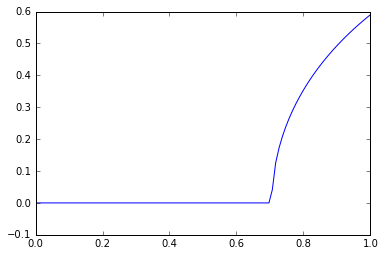

In [152]:
x_range=np.linspace(0,1,100)
plt.plot(x_range,[x_fermi(0,a) for a in x_range])

Запрогать Омега(фи, мю), где мю - свободная переменная.
plt.plot(phi_range, [Norm(phi,np.inf) for phi in phi_range])
